# Importing libraries

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

# Saving data

In [7]:
url = "http://www.football-data.co.uk/mmz4281/1819/D1.csv" # the dataset we will be using

In [8]:
### Saving the csv file to my Predictor folder ###

testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("~/Desktop/Bundesliga-Predictor/datasets/D1.csv")

In [9]:
### Reading the csv file ###

df = pd.read_csv("~/Desktop/Bundesliga-Predictor/datasets/D1.csv")
df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [6]:
### Head of the csv file ### -- more on the abbreviations in notes.txt 

df.head()

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,D1,24/08/2018,Bayern Munich,Hoffenheim,3,1,H,1,0,...,3.55,22,-2.00,1.92,1.87,2.05,1.99,1.23,7.15,14.10
1,1,D1,25/08/2018,Fortuna Dusseldorf,Augsburg,1,2,A,1,0,...,1.76,20,0.00,1.80,1.76,2.17,2.11,2.74,3.33,2.78
2,2,D1,25/08/2018,Freiburg,Ein Frankfurt,0,2,A,0,1,...,1.69,20,-0.25,2.02,1.99,1.92,1.88,2.52,3.30,3.07
3,3,D1,25/08/2018,Hertha,Nurnberg,1,0,H,1,0,...,1.76,20,-0.25,1.78,1.74,2.21,2.14,1.79,3.61,5.21
4,4,D1,25/08/2018,M'gladbach,Leverkusen,2,0,H,0,0,...,2.32,20,0.00,2.13,2.07,1.84,1.78,2.63,3.70,2.69


# Cleaning the data

In [29]:
### Removing betting data ###
# Bonus: Add betting data as the input to improve your model

import warnings
warnings.filterwarnings('ignore')

bet_16 = df.ix[:,23:] ## for future purposes

NUMBEROFTEAMS = 18 # constant for the number of teams in the Premier League
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1) # division and date aren't important

### Creating a feature table ###

feature_table = df.ix[:,:23]

In [30]:
res_16.tail(10)

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
224,224,Fortuna Dusseldorf,Ein Frankfurt,0,3,A,0,0,D,7,...,3,6,9,14,1,5,1,2,0,0
225,225,M'gladbach,Freiburg,1,1,D,1,1,D,13,...,2,2,10,13,10,6,0,3,0,0
226,226,Augsburg,Hannover,3,1,H,0,1,A,22,...,10,4,11,10,2,3,1,4,0,0
227,227,Hertha,Dortmund,2,3,A,2,1,H,7,...,4,8,10,5,4,10,3,3,2,0
228,228,Schalke 04,RB Leipzig,0,1,A,0,1,A,14,...,3,4,12,16,0,6,1,1,0,0
229,229,Stuttgart,Hoffenheim,1,1,D,0,1,A,13,...,2,8,10,15,4,9,4,2,0,0
230,230,Wolfsburg,Fortuna Dusseldorf,5,2,H,1,1,D,19,...,10,6,15,9,7,5,1,1,0,0
231,231,Bayern Munich,Mainz,6,0,H,3,0,H,22,...,11,1,7,5,13,2,1,0,0,0
232,232,Ein Frankfurt,Nurnberg,1,0,H,1,0,H,24,...,4,3,4,13,8,3,0,2,0,0
233,233,Leverkusen,Werder Bremen,1,3,A,0,2,A,15,...,2,5,8,11,10,3,3,2,0,0


In [31]:
### Creating a new table which will be used to train the model ###

# Team, Home Goals Scored, Away Goals Scored, Home Attacking Strength, Away Attacking Strength, 
# Home Goals Conceded, Away Goals Conceded, Home Defensive Strength, Away Defensive Strength
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table = table[:-10]
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [32]:
#res_16 = res_16[:-10] #deleting the last 10 
#res_16.shape[0]

In [33]:
### Data analysis for Home Goals Scored, AGS, Home Goals Conceded, AGC ###

avg_HGS = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_AGS = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_HGC = avg_AGS # HGC = AGS
avg_AGC = avg_HGS # AGC = HGS
print("Average number of goals at home",avg_HGS)
print("Average number of goals away", avg_AGS)
print("Average number of goals conceded at home",avg_HGC)
print("Average number of goals conceded away",avg_AGC)

Average number of goals at home 1.7222222222222223
Average number of goals away 1.393162393162393
Average number of goals conceded at home 1.393162393162393
Average number of goals conceded away 1.7222222222222223


In [36]:
### Grouping by HomeTeam and AwayTeam ###
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

### List of Augsburg home games ###
list(res_home)[0][1]

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
10,10,Augsburg,M'gladbach,1,1,D,1,0,H,18,...,7,2,12,12,9,4,1,2,0,0
28,28,Augsburg,Werder Bremen,2,3,A,1,2,A,21,...,7,7,10,11,7,4,2,2,0,0
52,52,Augsburg,Freiburg,4,1,H,2,0,H,21,...,10,6,12,8,5,3,0,1,0,0
64,64,Augsburg,RB Leipzig,0,0,D,0,0,D,6,...,0,3,20,24,2,2,2,5,0,0
82,82,Augsburg,Nurnberg,2,2,D,1,0,H,17,...,4,5,16,11,6,6,3,3,0,0
100,100,Augsburg,Ein Frankfurt,1,3,A,0,1,A,25,...,10,7,3,12,8,5,1,2,0,0
127,127,Augsburg,Schalke 04,1,1,D,1,0,H,17,...,9,5,17,8,6,7,2,1,0,0
151,151,Augsburg,Wolfsburg,2,3,A,0,2,A,10,...,4,5,12,11,3,4,2,3,0,0
154,154,Augsburg,Fortuna Dusseldorf,1,2,A,0,1,A,13,...,6,3,13,9,5,3,3,1,0,0
178,178,Augsburg,Mainz,3,0,H,2,0,H,19,...,8,0,18,10,7,3,0,1,0,0


In [37]:
### Adding HGS, HGC, AGS, AGC to the table ###

table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values

### Adding the the team to the table ### -- implemented in a strange manner

teams = []
i = 0
while i < NUMBEROFTEAMS:
    x = list(res_home.HomeTeam)[i][0]
    teams.append(x)
    i+=1
    
    
table.Team = teams
table # HAS, AAS, HDS, ADS still missing

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Augsburg,24,13,NaN,NaN,21,26,NaN,NaN
1,Bayern Munich,35,33,NaN,NaN,12,15,NaN,NaN
2,Dortmund,43,21,NaN,NaN,18,12,NaN,NaN
3,Ein Frankfurt,28,23,NaN,NaN,16,14,NaN,NaN
4,Fortuna Dusseldorf,17,16,NaN,NaN,21,29,NaN,NaN
5,Freiburg,25,12,NaN,NaN,20,22,NaN,NaN
6,Hannover,11,13,NaN,NaN,24,37,NaN,NaN
7,Hertha,21,19,NaN,NaN,19,20,NaN,NaN
8,Hoffenheim,21,29,NaN,NaN,14,24,NaN,NaN
9,Leverkusen,21,26,NaN,NaN,19,21,NaN,NaN


In [38]:
### Computing the number of games each team played ### -- assumming number of home games == number of away games
num_games = res_16.shape[0]/NUMBEROFTEAMS
num_games

13.0

In [39]:
### Completing the Home Attacking Strength, Away Attacking Strength, Home Defensive Strength ###
### Away Defensive Strength ###

table.HAS = (table.HGS / num_games) / avg_HGS
table.AAS = (table.AGS / num_games) / avg_AGS
table.HDS = (table.HGC / num_games) / avg_HGC
table.ADS = (table.AGC / num_games) / avg_AGC
table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Augsburg,24,13,1.071960,0.717791,21,26,1.159509,1.161290
1,Bayern Munich,35,33,1.563275,1.822086,12,15,0.662577,0.669975
2,Dortmund,43,21,1.920596,1.159509,18,12,0.993865,0.535980
3,Ein Frankfurt,28,23,1.250620,1.269939,16,14,0.883436,0.625310
4,Fortuna Dusseldorf,17,16,0.759305,0.883436,21,29,1.159509,1.295285
5,Freiburg,25,12,1.116625,0.662577,20,22,1.104294,0.982630
6,Hannover,11,13,0.491315,0.717791,24,37,1.325153,1.652605
7,Hertha,21,19,0.937965,1.049080,19,20,1.049080,0.893300
8,Hoffenheim,21,29,0.937965,1.601227,14,24,0.773006,1.071960
9,Leverkusen,21,26,0.937965,1.435583,19,21,1.049080,0.937965


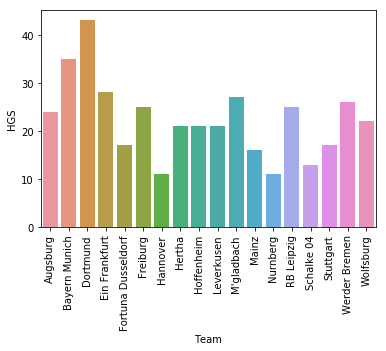

In [40]:
### Plotting the results in a nice bar chart ###

has_plot = sns.barplot(table.Team,table.HGS) # Home Goals Scored
for item in has_plot.get_xticklabels():
    item.set_rotation(90) # so that the x-axis labels are readable

In [47]:
### Man United Stats ###

table[table.Team == "Bayern Munich"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
1,Bayern Munich,35,33,1.563275,1.822086,12,15,0.662577,0.669975


In [42]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

### Creating a feature table ###
# We will only add HAS, HDS, AAS, ADS since they are the immediate result of HGS, HGC, AGS, AGC

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
f_HGS = []
f_HGC = []
f_AGS = []
f_AGC = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])
    f_HGS.append(table[table['Team'] == row['HomeTeam']]['HGS'].values[0])
    f_HGC.append(table[table['Team'] == row['HomeTeam']]['HGC'].values[0])
    f_AGS.append(table[table['Team'] == row['AwayTeam']]['AGS'].values[0])
    f_AGC.append(table[table['Team'] == row['AwayTeam']]['HGC'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table['HGS'] = f_HGS
feature_table['HGC'] = f_HGC
feature_table['AGS'] = f_AGS
feature_table['AGC'] = f_AGC


feature_table.head(15)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC
0,Bayern Munich,Hoffenheim,H,5,5,1.563275,0.662577,1.601227,1.071960,35,12,29,14
1,Fortuna Dusseldorf,Augsburg,A,5,7,0.759305,1.159509,0.717791,1.161290,17,21,13,21
2,Freiburg,Ein Frankfurt,A,6,2,1.116625,1.104294,1.269939,0.625310,25,20,23,16
3,Hertha,Nurnberg,H,3,3,0.937965,1.049080,0.441718,1.607940,21,19,8,16
4,M'gladbach,Leverkusen,H,7,3,1.205955,0.828221,1.435583,0.937965,27,15,26,19
5,Werder Bremen,Hannover,D,3,4,1.161290,1.159509,0.717791,1.652605,26,21,13,24
6,Wolfsburg,Schalke 04,H,7,4,0.982630,1.104294,0.773006,1.027295,22,20,14,21
7,Dortmund,RB Leipzig,H,5,7,1.920596,0.993865,1.049080,0.535980,43,18,19,8
8,Mainz,Stuttgart,H,3,3,0.714640,0.883436,0.496933,1.384615,16,16,9,25
9,Hannover,Dortmund,D,0,3,0.491315,1.325153,1.159509,0.535980,11,24,21,18


In [43]:
### Representing the result as an integer ### -- this will be the y

def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [44]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [45]:

pred_table = feature_table.tail(10)
feature_table = feature_table[:-10] ### Removing last week so we can predict it

feature_table.tail(15)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC,Result
209,Hertha,Mainz,H,4,1,0.937965,1.049080,0.607362,1.295285,21,19,11,16,1
210,Leverkusen,Freiburg,H,5,3,0.937965,1.049080,0.662577,0.982630,21,19,12,20,1
211,M'gladbach,Bayern Munich,A,2,14,1.205955,0.828221,1.822086,0.669975,27,15,33,12,-1
212,Nurnberg,RB Leipzig,A,1,5,0.491315,0.883436,1.049080,0.535980,11,16,19,8,-1
213,Schalke 04,Fortuna Dusseldorf,A,2,5,0.580645,1.159509,0.883436,1.295285,13,21,16,21,-1
214,Stuttgart,Hannover,H,8,1,0.759305,1.380368,0.717791,1.652605,17,25,13,24,1
215,Wolfsburg,Werder Bremen,D,5,3,0.982630,1.104294,1.104294,0.759305,22,20,20,21,0
216,Werder Bremen,Schalke 04,H,7,8,1.161290,1.159509,0.773006,1.027295,26,21,14,21,1
217,Bayern Munich,Wolfsburg,H,12,1,1.563275,0.662577,1.214724,0.848635,35,12,22,20,1
218,Dortmund,Stuttgart,H,8,1,1.920596,0.993865,0.496933,1.384615,43,18,9,25,1


In [46]:
pred_table

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,HGS,HGC,AGS,AGC,Result
224,Fortuna Dusseldorf,Ein Frankfurt,A,3,6,0.759305,1.159509,1.269939,0.625310,17,21,23,16,-1
225,M'gladbach,Freiburg,D,2,2,1.205955,0.828221,0.662577,0.982630,27,15,12,20,0
226,Augsburg,Hannover,H,10,4,1.071960,1.159509,0.717791,1.652605,24,21,13,24,1
227,Hertha,Dortmund,A,4,8,0.937965,1.049080,1.159509,0.535980,21,19,21,18,-1
228,Schalke 04,RB Leipzig,A,3,4,0.580645,1.159509,1.049080,0.535980,13,21,19,8,-1
229,Stuttgart,Hoffenheim,D,2,8,0.759305,1.380368,1.601227,1.071960,17,25,29,14,0
230,Wolfsburg,Fortuna Dusseldorf,H,10,6,0.982630,1.104294,0.883436,1.295285,22,20,16,21,1
231,Bayern Munich,Mainz,H,11,1,1.563275,0.662577,0.607362,1.295285,35,12,11,16,1
232,Ein Frankfurt,Nurnberg,H,4,3,1.250620,0.883436,0.441718,1.607940,28,16,8,16,1
233,Leverkusen,Werder Bremen,A,2,5,0.937965,1.049080,1.104294,0.759305,21,19,20,21,-1


# Training the data

In [48]:
### Setting the parameters and the result for our model ###

from sklearn.model_selection import train_test_split

X = feature_table[['HST','AST','HAS','HDS','AAS','ADS','HGS','HGC','AGS','AGC']]
y = feature_table['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [49]:
### Printing the shapes ###

print(X_train.shape, X_test.shape)

(168, 10) (56, 10)


In [50]:
### Importing machine learning Classifiers ###

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [51]:
### Comparing 4 Classifiers and their accuracies ###

RFC = RandomForestClassifier()
MNB = MultinomialNB()
XGB = XGBClassifier()
SVC = LinearSVC()

In [52]:
### SVC ### -- changes a lot

y_pred = SVC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = SVC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(SVC, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.625
Train Accuracy score:  0.6071428571428571
[0.60869565 0.65217391 0.34782609 0.60869565 0.30434783 0.68181818
 0.36363636 0.54545455 0.72727273 0.61904762]
Mean accuracy score:
0.545896856766422


In [53]:
### RFC ### -- Train accuracy is maybe overfitted here
y_pred = RFC.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = RFC.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(RFC, X, y, cv=10)
print(scores)
print("Mean accuracy score:")
print(scores.mean())



Test Accuracy score:  0.5178571428571429
Train Accuracy score:  0.9642857142857143
[0.43478261 0.52173913 0.60869565 0.60869565 0.43478261 0.45454545
 0.45454545 0.59090909 0.59090909 0.52380952]
Mean accuracy score:
0.5223414266892528


In [54]:
### XGB ### -- a very good accuracy

y_pred = XGB.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = XGB.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(XGB, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.5357142857142857
Train Accuracy score:  0.8809523809523809
[0.30434783 0.56521739 0.52173913 0.60869565 0.47826087 0.40909091
 0.40909091 0.68181818 0.63636364 0.42857143]
Mean accuracy score:
0.5043195934500282


In [55]:
### MNB ### -- all accuracies not bad either

y_pred = MNB.fit(X_train,y_train).predict(X_test)
print("Test Accuracy score: ", accuracy_score(y_pred,y_test))
y_pred = MNB.fit(X_train,y_train).predict(X_train)
print("Train Accuracy score: ", accuracy_score(y_pred,y_train))

### Mean of 10 scores out of the whole set ###

scores = cross_val_score(MNB, X, y, cv=10) # TODO: optimize
print(scores)
print("Mean accuracy score:")
print(scores.mean())

Test Accuracy score:  0.7142857142857143
Train Accuracy score:  0.5654761904761905
[0.39130435 0.69565217 0.65217391 0.52173913 0.43478261 0.63636364
 0.5        0.54545455 0.86363636 0.71428571]
Mean accuracy score:
0.5955392433653303


# Improvements -- Working On

In [29]:
### TESTING ###

ht = res_16.loc[40].HomeTeam 
at = res_16.loc[40].AwayTeam

ht
at

'Brighton'

In [30]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]
feat_table.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
379,West Ham,Everton,H,3,1,15,14,6,6
378,Tottenham,Leicester,H,5,4,14,16,4,4
377,Swansea,Stoke,A,1,2,26,8,6,0
376,Southampton,Man City,A,0,1,8,13,1,12
375,Newcastle,Chelsea,H,3,0,16,6,4,2


In [31]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Leicester','Man United','D',0,0,0,0,0,0],
                             ['Burnley','Tottenham','D',0,0,0,0,0,0],
                             ['Swansea','Crystal Palace','D',0,0,0,0,0,0],
                             ['West Ham','Newcastle','D',0,0,0,0,0,0],
                             ['Stoke','West Brom','D',0,0,0,0,0,0],
                             ['Southampton','Huddersfield','D',0,0,0,0,0,0],
                             ['Man City','Bournemouth','D',0,0,0,0,0,0],
                             ['Brighton','Watford','D',0,0,0,0,0,0],
                             ['Everton','Chelsea','D',0,0,0,0,0,0],
                             ['Arsenal','Liverpool','D',0,0,0,0,0,0]],columns=feat_table.columns)

new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
389,Leicester,Man United,D,0,0,0,0,0,0
388,Burnley,Tottenham,D,0,0,0,0,0,0
387,Swansea,Crystal Palace,D,0,0,0,0,0,0
386,West Ham,Newcastle,D,0,0,0,0,0,0
385,Stoke,West Brom,D,0,0,0,0,0,0
384,Southampton,Huddersfield,D,0,0,0,0,0,0
383,Man City,Bournemouth,D,0,0,0,0,0,0
382,Brighton,Watford,D,0,0,0,0,0,0
381,Everton,Chelsea,D,0,0,0,0,0,0
380,Arsenal,Liverpool,D,0,0,0,0,0,0


In [32]:
feat_table = new_feat_table
feat_table.shape

(390, 9)

In [33]:
# Past Home Shots, Home Corners, Home Goals...

#Adding k recent performance measures
feat_table["past_HS"] = 0.0
feat_table["past_HC"] = 0.0
feat_table["past_AS"] = 0.0
feat_table["past_AC"] = 0.0
feat_table["past_HG"] = 0.0
feat_table["past_AG"] = 0.0

In [34]:
feat_table.head(12)


,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG
389,Leicester,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
388,Burnley,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
387,Swansea,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
386,West Ham,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
385,Stoke,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
384,Southampton,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
383,Man City,Bournemouth,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
382,Brighton,Watford,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
381,Everton,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
380,Arsenal,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
### testing
for index,row in feat_table.iterrows():
    print (row['HomeTeam'], table[table['Team'] == row['HomeTeam']]['HAS'].values)

Leicester [0.85910653]
Burnley [0.54982818]
Swansea [0.58419244]
West Ham [0.82474227]
Stoke [0.68728522]
Southampton [0.68728522]
Man City [2.09621993]
Brighton [0.82474227]
Everton [0.96219931]
Arsenal [1.8556701]
West Ham [0.82474227]
Tottenham [1.37457045]
Swansea [0.58419244]
Southampton [0.68728522]
Newcastle [0.72164948]
Man United [1.30584192]
Liverpool [1.54639175]
Huddersfield [0.54982818]
Crystal Palace [0.99656357]
Burnley [0.54982818]
West Ham [0.82474227]
Tottenham [1.37457045]
Man City [2.09621993]
Leicester [0.85910653]
Chelsea [1.03092784]
Swansea [0.58419244]
Man City [2.09621993]
Chelsea [1.03092784]
Arsenal [1.8556701]
West Brom [0.72164948]
Watford [0.92783505]
Stoke [0.68728522]
Leicester [0.85910653]
Everton [0.96219931]
Bournemouth [0.89347079]
Brighton [0.82474227]
Tottenham [1.37457045]
West Ham [0.82474227]
Man United [1.30584192]
Swansea [0.58419244]
Southampton [0.68728522]
Newcastle [0.72164948]
Liverpool [1.54639175]
Huddersfield [0.54982818]
Crystal Pala

West Brom [0.72164948]
Watford [0.92783505]
Southampton [0.68728522]
Everton [0.96219931]
Crystal Palace [0.99656357]
Chelsea [1.03092784]
Brighton [0.82474227]
Arsenal [1.8556701]


In [48]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)
    feat_table.set_value(i, 'past_HC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'past_AC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'past_HS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'past_AS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'past_HG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'past_AG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)
    
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS   



In [49]:
feat_table.head()

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS
389,Leicester,Man United,D,0,0,0,0,0,0,14.00,6.50,8.75,5.25,1.75,0.75,0.859107,1.009174,1.422018,1.305842
388,Burnley,Tottenham,D,0,0,0,0,0,0,12.25,4.25,13.00,4.75,0.50,2.00,0.549828,0.779817,0.917431,0.756014
387,Swansea,Crystal Palace,D,0,0,0,0,0,0,11.25,6.25,8.50,4.25,0.25,2.25,0.584192,1.100917,0.504587,1.099656
386,West Ham,Newcastle,D,0,0,0,0,0,0,15.50,3.75,9.25,4.25,1.50,1.00,0.824742,1.192661,1.100917,1.443299
385,Stoke,West Brom,D,0,0,0,0,0,0,18.75,4.75,13.75,5.25,1.00,1.00,0.687285,1.376147,0.688073,1.305842


In [50]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)
test_table.head()

,HomeTeam,AwayTeam,FTR,past_HS,past_HC,past_AS,past_AC,past_HG,past_AG,HAS,HDS,AAS,ADS
389,Leicester,Man United,D,14.00,6.50,8.75,5.25,1.75,0.75,0.859107,1.009174,1.422018,1.305842
388,Burnley,Tottenham,D,12.25,4.25,13.00,4.75,0.50,2.00,0.549828,0.779817,0.917431,0.756014
387,Swansea,Crystal Palace,D,11.25,6.25,8.50,4.25,0.25,2.25,0.584192,1.100917,0.504587,1.099656
386,West Ham,Newcastle,D,15.50,3.75,9.25,4.25,1.50,1.00,0.824742,1.192661,1.100917,1.443299
385,Stoke,West Brom,D,18.75,4.75,13.75,5.25,1.00,1.00,0.687285,1.376147,0.688073,1.305842


In [51]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [52]:
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(390, 19)


380

In [53]:
X_train = test_table[['past_HS','past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['past_HS','past_HC','past_AS','past_AC','past_HG','past_AG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [38]:
### Try these predictions again